# EDA Tutorial

In [4]:
import pandas as pd      
import numpy as np         
import matplotlib.pyplot as plt         
import seaborn as  sns  

##### Read Netflix_Userbase Data


In [5]:
df = pd.read_csv('/Users/beatrice/Desktop/DAC-Curriculum/DAC-005_Intro_to_Tableau/Netflix_Userbase.csv')

In [6]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [8]:
df.shape 

(2500, 10)

In [9]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [10]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [11]:
df.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

       

##### Clean Netflix_Userbase Data


In [9]:
duplicates = df.duplicated().sum()
print("number of rows: ", duplicates.shape)

number of rows:  ()


In [10]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()


User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

##### Read Netflix_Userbase Data 


a. What subscription types are there?

In [20]:
subscription_types = df['Subscription Type'].unique()
print("Subscription Types:", subscription_types)

Subscription Types: ['Basic' 'Premium' 'Standard']


b. Is It a monthly subscription? or yearly?

In [22]:
plan_duration_types = df['Plan Duration'].unique()
print ("Plan Durations: ", plan_duration_types)

Plan Durations:  ['1 Month']


c. What are the different prices of the subscriptions?

In [25]:
subscription_prices = df.groupby('Subscription Type')['Monthly Revenue'].unique()
print("Subscription_Prices:\n", subscription_prices)

Subscription_Prices:
 Subscription Type
Basic       [10, 13, 12, 11, 15, 14]
Premium     [15, 13, 10, 11, 12, 14]
Standard    [12, 15, 13, 11, 14, 10]
Name: Monthly Revenue, dtype: object


##### Netflix_Userbase Data Visualisation


a. Sales per month

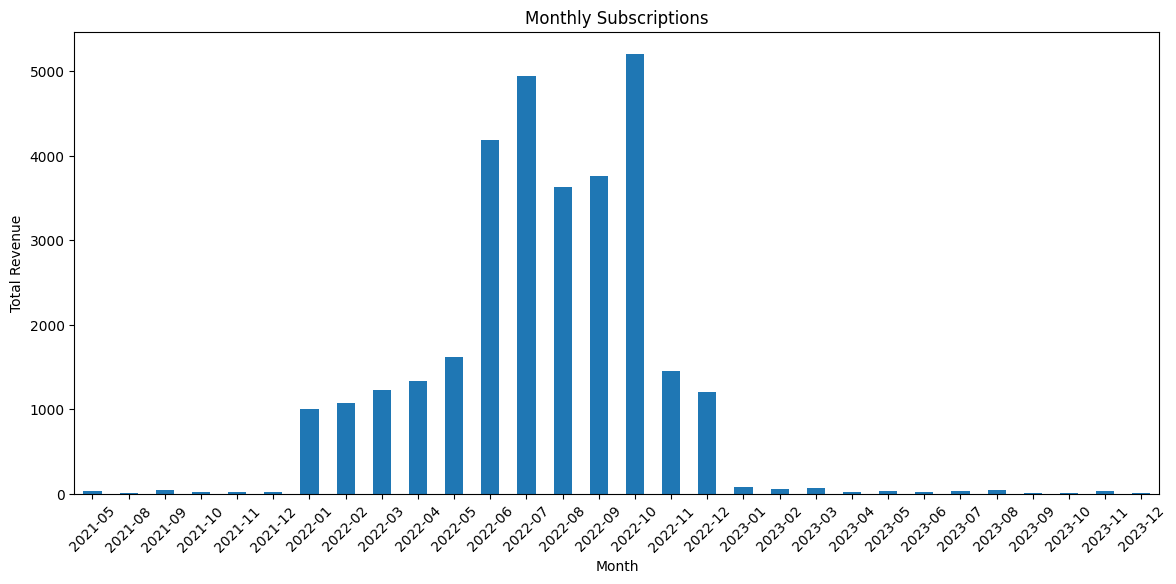

In [30]:
# Ensure 'Join Date' is in datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'])

# Extract month and year for aggregation
df['Month'] = df['Join Date'].dt.to_period('M')

# Group by month and sum the Monthly Revenue
monthly_sales = df.groupby('Month')['Monthly Revenue'].sum().sort_index()

# Plotting
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar', title='Monthly Subscriptions')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



b. Most popular subscription type

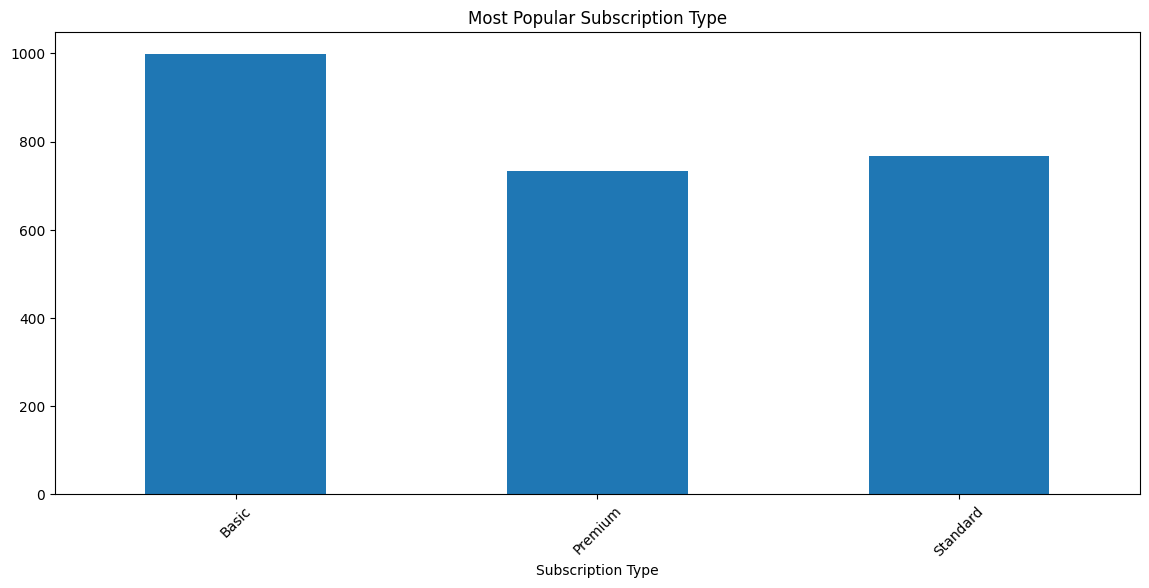

In [33]:
plt.rcParams['figure.figsize'] = (14, 6)
df['Subscription Type'].value_counts().sort_index().plot(kind='bar', title='Most Popular Subscription Type')
plt.xticks(rotation=45) 
plt.show()


c. Gender vs Subscription Type

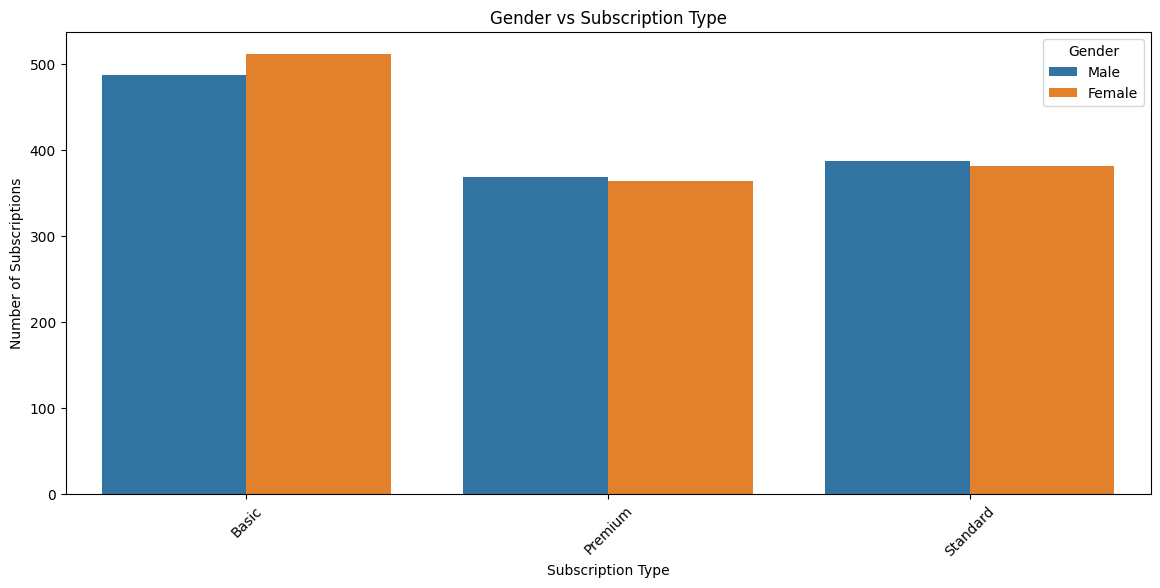

In [36]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Subscription Type', hue='Gender')
plt.title('Gender vs Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.show()

d. Number of Users vs Country

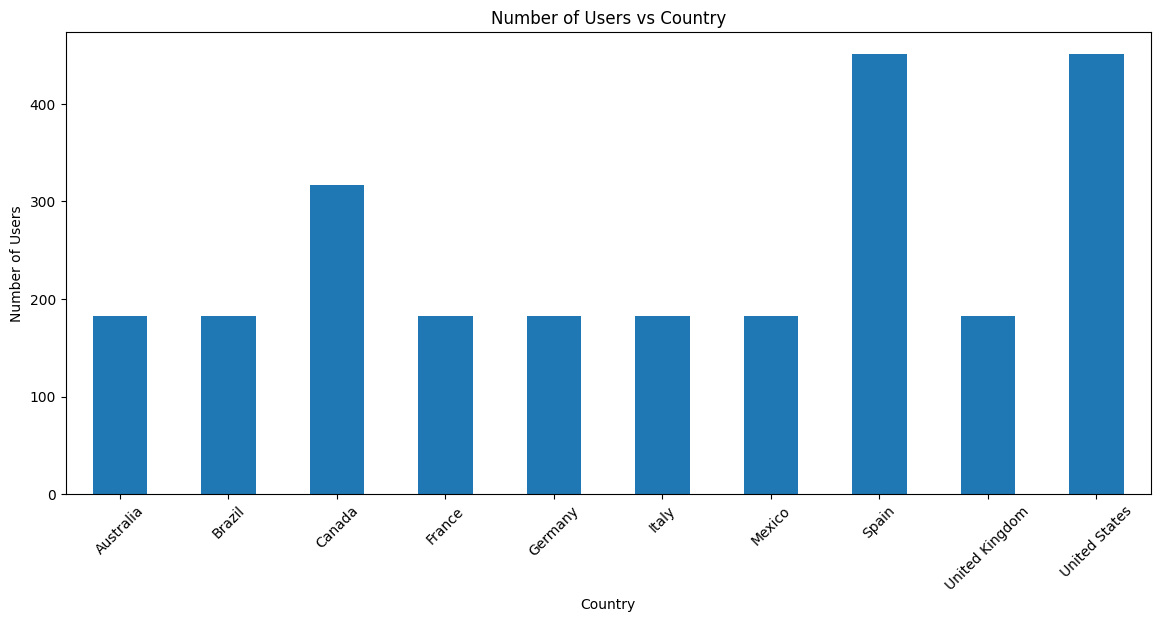

In [42]:
plt.rcParams['figure.figsize'] = (14, 6)
df['Country'].value_counts().sort_index().plot(kind='bar', title='Number of Users vs Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45) 
plt.show()